## pochodna (różniczkowanie numeryczne)

Różnica dzielona w przód

Rozwińmy funkcję $f(x)$ w otoczeniu $h$ punktu $x$ w szereg Taylora:

$$ f(x+h) = f(x)+ f'(x)h +O(h^2)$$

Dzieląc przez $h$ otrzymujemy:

$$ \displaystyle \frac{f(x+h)-f(x) }{h}=f'(x) + O(h)$$

Np. różnica centralna:

$$ \displaystyle \frac{f(x)-f(x-h) }{2h}=f'(x) + O(h^2)$$

In [5]:
import numpy as np
x = np.linspace(0, 10, 10)
f = np.sin(x)
f1 = np.cos(x)

df = f[1:] - f[:-1]
dx = x[1:] - x[:-1]

x2 = (x[1:] + x[:-1])/2

fp = df/dx
fp.shape, x.shape



((9,), (10,))

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

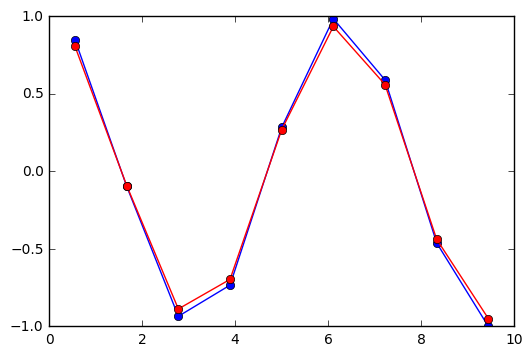

In [8]:
plt.plot(x2, np.cos(x2), 'o-')
plt.plot(x2, fp, 'ro-')

## Numeryczne całkowanie

Całka to pole, więc obliczmy je w przybliżony sposób za pomocą prostokątów.

Przedział $[a,b]$ jest podzielony na $n$ podprzedziałów $$(a,x_1), (x_1,x_2), ..., (x_{n-1},b),$$ punkt $\xi_{j}$ zaś, dla $j = 1, 2, ..., n$ leży gdzieś wewnątrz $j$-tego odcinka. Tworzymy sumę:

$$S_{n} = \sum_{j=1}^{n}f(\xi_{j})(x_{j} - x_{j-1}) = \sum_{j=1}^{n}f(\xi_{j}) \Delta x_{j}$$

przy czym $x_0 = a$, $x_n = b$ oraz $\Delta x_j = x_j - x_{j-1}$. 

Geometrycznie suma ta, nazywana sumą Riemanna, jest sumą pól prostokątów zaznaczonych na rysunku poniżej. Jeżeli będziemy dzielić $[a,b]$ na coraz to więcej odcinków o coraz to mniejszych długościach, otrzymamy jako granicę sum Riemanna całkę Riemanna funkcji $f(x)$, oznaczaną przez:

$$ \int_{a}^{b} f(x)dx = \lim_{|L| \to 0} \sum_{j=1}^{n} f(\xi_{j}) \Delta x_{j} \quad (1) $$

gdzie przez $|L|$ oznaczyliśmy długość największego z podprzedziałów.

## funkcja pierwotna

$$ \int_{a}^{b} f(x)dx = F(b) - F(a) $$

$$F(x) = \int_{a}^{x} f(x')dx' $$ 



## pochodne funkcji wielu zmiennych 




In [1]:
import numpy as np
x = np.linspace(-2,1,40)
y = np.linspace(-2,3,34)
X,Y = np.meshgrid(x,y)

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [3]:
import sympy
from sympy.abc import x,y
sympy.init_printing(use_latex='mathjax')

In [4]:
from IPython.display import display

     2      2
  - x  - 2⋅y 
-ℯ           

<IPython.core.display.Javascript object>


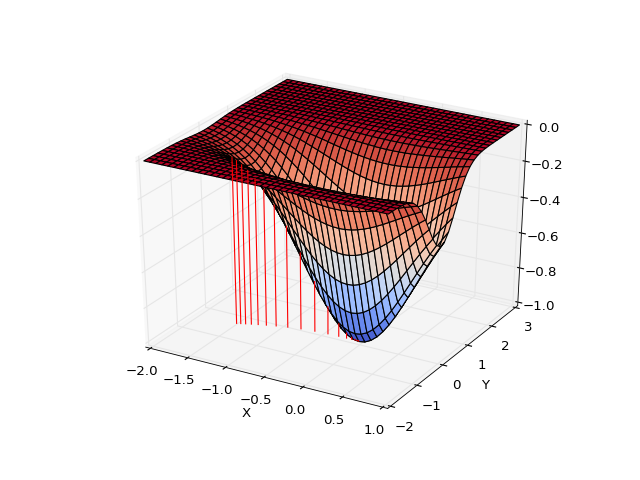

In [5]:
f_symb = -sympy.exp(-(x**2+2*y**2))
display(f_symb)

F = sympy.lambdify((x,y),f_symb,np)
Fx = sympy.lambdify((x,y),f_symb.diff(x),np)
Fy = sympy.lambdify((x,y),f_symb.diff(y),np)

fig = plt.figure()
ax = fig.gca(projection='3d')

#ax.plot_wireframe(X,Y,F)
ax.plot_surface(X, Y, F(X,Y), cmap=cm.coolwarm,rstride=1,cstride=1)
#ax.quiver3D(X, Y, Fx, Fy) #, cmap=cm.coolwarm,rstride=1,cstride=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [6]:
x0,y0 = -1.5,-.5
h = 0.2
for i in range(30):
    x0 += -h * Fx(x0,y0)
    y0 += -h * Fy(x0,y0)
    #ax.scatter3D(x0,y0,F(x0,y0),s=240,c='g',marker='o')
    ax.plot([x0,x0],[y0,y0],[-1,F(x0,y0)],c='r')


<IPython.core.display.Javascript object>


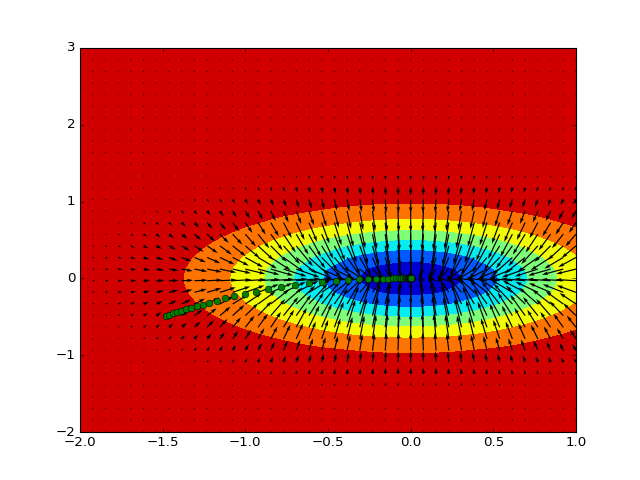

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [7]:
plt.figure()
plt.contourf(X,Y,F(X,Y))
plt.quiver(X,Y,-Fx(X,Y),-Fy(X,Y))
plt

In [8]:
x0,y0 = -1.5,-.5
h = 0.1
for i in range(100):
    x0 += -h * Fx(x0,y0)
    y0 += -h * Fy(x0,y0)
    plt.plot(x0,y0,'go')

## hill shading

In [9]:
x_ = np.linspace(-5,5,150)
y_ = np.linspace(-5,5,154)
X,Y = np.meshgrid(x_,y_)

f_symb = sympy.sin(x**2/4+y**2)
expr = sympy.diff(f_symb,x)
display(f_symb)

F = sympy.lambdify((x,y),f_symb,np)
Fx = sympy.lambdify((x,y),f_symb.diff(x),np)
Fy = sympy.lambdify((x,y),f_symb.diff(y),np)



   ⎛ 2     ⎞
   ⎜x     2⎟
sin⎜── + y ⎟
   ⎝4      ⎠

<IPython.core.display.Javascript object>


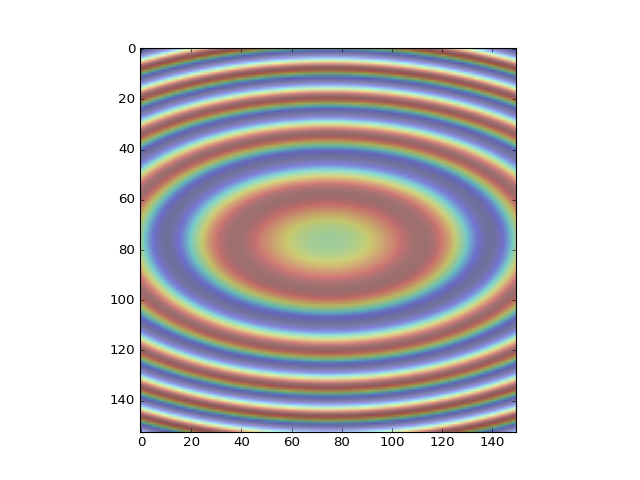

In [10]:
plt.figure()
plt.imshow(F(X,Y),alpha=.6,cmap='jet')
plt.imshow(np.diff(F(X,Y),axis=0),alpha=.4,cmap='gray')

# Laplasjan

https://en.wikipedia.org/wiki/Discrete_Laplace_operator

In [11]:
import sympy
from sympy.abc import x,y
sympy.init_printing(use_latex='mathjax')

In [12]:
from IPython.display import display

In [13]:
f_symb = sympy.sin(x**2+y**2)
lap_f = f_symb.diff(x,2) + f_symb.diff(y,2)
display(lap_f.simplify())


     2    ⎛ 2    2⎞      2    ⎛ 2    2⎞        ⎛ 2    2⎞
- 4⋅x ⋅sin⎝x  + y ⎠ - 4⋅y ⋅sin⎝x  + y ⎠ + 4⋅cos⎝x  + y ⎠